# Week 4: Pandas

(2017-07-25 15:26)

## 4.1. Working with Pandas Part 1

### 4.1.1. Why Pandas
Benefits: built on top of NumPy, data variety support, integration and transformation; visualization is made easier; descriptive statistics; support for time-series data. Pandas data structures: i) Series is a 1-d labeled array that support many data types; and ii) DataFrame is a 2-d labeled data, a dictionary of Series objects of differente types.

### 4.1.2. Notebooks for Week 4

### 4.1.3. Live Code: Why Pandas

In [1]:
import pandas as pd

Series

In [2]:
ser = pd.Series(data = [ 100, 200, 300, 400, 500],
                index = ['tom', 'bob', 'nancy', 'dan', 'eric'])
ser

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [3]:
ser.index # list of indices

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [4]:
# we can use rectangular brackets to access data at that location
print(ser['nancy'])
print(ser.loc['nancy']) # we can explicitly use the loc (location) function

300
300


In [5]:
# accessing multiple locations
print(ser[['nancy', 'bob']])
print()
print(ser[[4, 3, 1]])
print()
print(ser.iloc[[2]]) # we can explicitly use the iloc (ilocation) function

nancy    300
bob      200
dtype: int64

eric    500
dan     400
bob     200
dtype: int64

nancy    300
dtype: int64


In [6]:
# check if an index exists in the Series
'bob' in ser

True

In [7]:
# multiply whole Series by two
ser * 2

tom       200
bob       400
nancy     600
dan       800
eric     1000
dtype: int64

DataFrame

In [8]:
# create a DataFrame from a dictionary

d = {'one': pd.Series([100., 200., 300.], index = ['apple', 'ball', 'clock']),
    'two': pd.Series([111., 222., 333., 444.], index = ['apple', 'ball', 'cerill', 'dancy'])}

In [9]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,444.0


In [10]:
df.index # indices

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [11]:
df.columns # columns

Index(['one', 'two'], dtype='object')

In [12]:
# subsetting by indices
pd.DataFrame(d, index = ['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,444.0
ball,200.0,222.0
apple,100.0,111.0


In [13]:
# subsetting, but adding a new column
pd.DataFrame(d, index = ['dancy', 'ball', 'apple'], columns = ['one', 'five'])

,one,five
dancy,NaN,NaN
ball,200.0,NaN
apple,100.0,NaN


In [14]:
# create a DataFrame from a Python list of dictionaries
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]
pd.DataFrame(data) # indices are inferred

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,NaN,2.0
1,NaN,20.0,10.0,5.0,NaN


In [15]:
pd.DataFrame(data, index = ['orange', 'red']) #inserting indices

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [16]:
# column subsetting
pd.DataFrame(data, columns = ['joe', 'dora', 'alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


Basic DataFrame operations

In [17]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,444.0


In [18]:
# slice one column
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [19]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,444.0,NaN


In [20]:
# logical operation

df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,444.0,NaN,False


In [21]:
# remove data from DataFrame using the pop function
three = df.pop('three')
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [22]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,444.0,False


In [23]:
# we could also use the del function

del df['two']

In [24]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [25]:
# creates a new column from another existing column
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [26]:
# get the first two values and assign it to a new column

df['one_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


### 4.1.4. Pandas: Data Ingestion
**csv** (comma-separated format) using the pandas.read_csv. **json** using pandas.read_json. **html** (hyper-text markup language) using read_html, the output is a list of Pandas DataFrames. **sql** (structured query language) using read_sql_query. The pandas.read_sql_table imports all sql file.

### 4.1.5. Live Code: Data Ingestion

In [27]:
!ls ./ml-latest-small # contents of the movie-lens

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [28]:
!cat ./ml-latest-small/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action
10,GoldenEye (1995),Action|Adventure|Thriller
11,"American President, The (1995)",Comedy|Drama|Romance
12,Dracula: Dead and Loving It (1995),Comedy|Horror
13,Balto (1995),Adventure|Animation|Children
14,Nixon (1995),Drama
15,Cutthroat Island (1995),Action|Adventure|Romance
16,Casino (1995),Crime|Drama
17,Sense and Sensibility (1995),Drama|Romance
18,Four Rooms (1995),Comedy
19,Ace Ventura: When Nature Calls (1995),Comedy
20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
21,Get Shorty (1995),Comedy|Crime|Thriller
22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
23,Assassins (1995),Ac

In [29]:
!cat ./ml-latest-small/movies.csv | wc -l # number of movies

9126


In [30]:
!head -5 ./ml-latest-small/tags.csv

In [31]:
!head -5 ./ml-latest-small/ratings.csv

Let's load the movies.csv, tags.csv and ratings.csv using the pandas.read_csv function

In [32]:
import pandas as pd

In [33]:
movies = pd.read_csv('./ml-latest-small/movies.csv')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
tags = pd.read_csv('./ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [35]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [36]:
# later we'll work on timestamps, for now we'll deleted them
del ratings['timestamp']
del tags['timestamp']

Playing with data structures

In [37]:
# extract the 0th row, notice it's indeed a Series
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [38]:
print(row_0)

userId                          15
movieId                        339
tag        sandra 'boring' bullock
Name: 0, dtype: object


In [39]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [40]:
row_0['userId']

15

In [41]:
'rating' in row_0

False

In [42]:
row_0.name

0

In [43]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [44]:
tags.head()

,userId,movieId,tag
0,15,339,sandra 'boring' bullock
1,15,1955,dentist
2,15,7478,Cambodia
3,15,32892,Russian
4,15,34162,forgettable


In [45]:
tags.index

RangeIndex(start=0, stop=1296, step=1)

In [46]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [47]:
# extract row 0, 11, 1000 from DataFrame
tags.iloc[[0, 11, 1000]]

,userId,movieId,tag
0,15,339,sandra 'boring' bullock
11,23,150,Ron Howard
1000,547,44199,toplist06


### 4.1.6. Pandas: Descriptive Statistics
describe() shows summary statistics, corr() shows pairwise Pearson coefficient of columns, min(), max(), mode(), median(). Generally the syntax is dataframe.function(), frequently used optional parameter is axis = 0 (rows) or 1 (columns).  
  
Also the logical any() returns whether any element is True and all() returns whether all element is True.  
  
Other functions: count(), clip(), rank(), round()

### 4.1.7. Live Code: Descriptive Statistics

In [48]:
ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [49]:
ratings['rating'].mean()

3.543608255669773

In [50]:
ratings['rating'].min()

0.5

In [51]:
ratings['rating'].max()

5.0

In [52]:
ratings['rating'].std()

1.0580641091073735

In [53]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [54]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,0.007126,0.010467
movieId,0.007126,1.000000,-0.028894
rating,0.010467,-0.028894,1.000000


In [55]:
filter1 = ratings['rating'] > 5
filter1.any()

False

In [56]:
filter2 = ratings['rating'] > 0
filter2.all()

True

## 4.2. Working with Pandas Part 2

### 4.2.1. Pandas: Data Cleaning
Real world is messy: missings, outliers, invalid, NaN, None etc.  
Handling the problem: replace the value, fill the gaps, drop fields, interpolation.  
Some functions: df.replace(), df.fillna(method = 'ffill' | 'backfill') - forward fill or backward fill), df.dropna(axis = 0|1), df.interpolate().

### 4.2.2. Live Code: Data Cleaning

In [57]:
!ls

ml-latest-small			    Week-2-UNIXDataFiles.zip
ml-latest-small.zip		    Week 3 NumPy.ipynb
Pandas_Course_Slides.pdf	    Week-3-Numpy.zip
Week-1-Intro-new.zip		    Week 4 Pandas.ipynb
Week 1.ipynb			    Week-4-Pandas.zip
Week 2 Intro Python and Unix.ipynb  word_cloud.zip


In [58]:
!ls ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [59]:
import pandas as pd

movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')

In [60]:
movies.shape

(9125, 3)

In [61]:
# is any row NULL?
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [62]:
ratings.shape

(100004, 4)

In [63]:
# is any row NULL?
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [64]:
tags.shape

(1296, 4)

In [65]:
# is any row NULL?
import numpy as np
tags['tag'][:5] = np.nan

tags.isnull().any()

/home/jayme/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [66]:
tags = tags.dropna()

In [67]:
# check again: is any row NULL?
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

### 4.2.3. Pandas: Data Visualization
df.plot.bar() - bar charts, df.plot.box() - box plots, df.plot.hist() - histograms, df.plot() - line graphs etc.

### 4.2.4. Live Code: Data Visualization

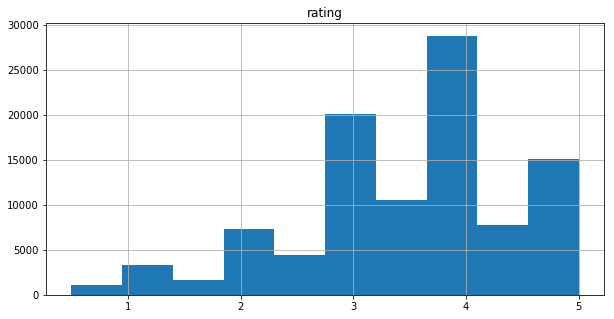

In [68]:
%matplotlib inline

ratings.hist(column = 'rating', figsize = (10, 5));

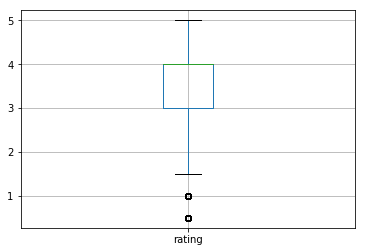

In [69]:
ratings.boxplot(column = 'rating');

### 4.2.5. Pandas: Frequent Data Operations
df['sensor1'] - slice a column, df[df['sensor2'] > 0] - filter out rows from a column, df['sensor4'] = df['sensor1'] \*\* 2 - create a new column, df.loc[10] = [10, 20, 30, 40] - insert a new row, df.drop(df.index[[5]]) - delete the 5th row from DataFrame, del df['sensor4'] - delete a column, df.groupby('student_id').mean() - mean of grades by student etc.

### 4.2.6. Live Code: Frequent Data Operations

Slicing

In [70]:
tags['tag'].head() # head of the tag column

5          short
6     dull story
7     powerpoint
8       activist
9    documentary
Name: tag, dtype: object

In [71]:
movies[['title', 'genres']].head() # head of the title and genres columns

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [72]:
ratings[1000:1010] # rows 1000 to 1010 from ratings df

,userId,movieId,rating,timestamp
1000,15,157,2.0,1052896975
1001,15,160,0.5,1093028411
1002,15,161,3.0,1093028319
1003,15,162,4.0,997938676
1004,15,163,2.0,1166586021
1005,15,164,4.0,997938413
1006,15,165,3.0,1093028183
1007,15,170,2.5,1166586376
1008,15,172,1.0,1093070329
1009,15,175,4.0,1166587180


In [73]:
ratings[-10:] # last ten rows of ratings

,userId,movieId,rating,timestamp
99994,671,5952,5.0,1063502716
99995,671,5989,4.0,1064890625
99996,671,5991,4.5,1064245387
99997,671,5995,4.0,1066793014
99998,671,6212,2.5,1065149436
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [74]:
tag_counts = tags['tag'].value_counts() # count the number of unique values in the columns tag from tags
tag_counts[:10] # top 10 tag counts

getdvd       33
Ei muista    29
toplist07    26
tivo         26
toplist12    20
toplist11    20
tcm          20
toplist08    19
toplist15    19
toplist09    18
Name: tag, dtype: int64

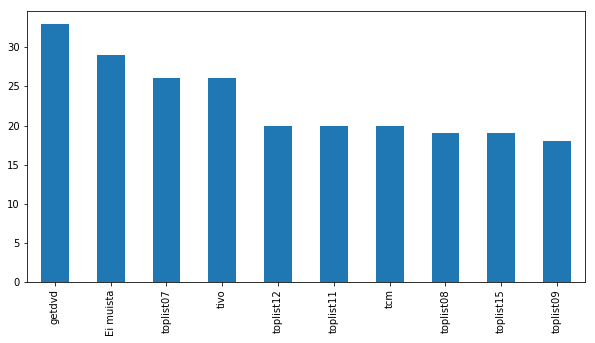

In [75]:
tag_counts[:10].plot(kind = 'bar', figsize = (10, 5));

Filter

In [76]:
is_highly_rated = ratings['rating'] >= 4.0 # filter movies with a rating more or equal to 4.0
ratings[is_highly_rated][-5:] # bottom 5 movies

,userId,movieId,rating,timestamp
99995,671,5989,4.0,1064890625
99996,671,5991,4.5,1064245387
99997,671,5995,4.0,1066793014
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363


In [77]:
is_animation = movies['genres'].str.contains('Animation') # search for the Animation string in the genres column
movies[is_animation][5:15]

,movieId,title,genres
279,313,"Swan Princess, The (1994)",Animation|Children
328,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
354,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
494,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
500,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
521,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
526,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
527,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
528,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
537,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [78]:
movies[movies['title'].str.contains('Christmas')].head() # search for movies titles that contain the string Christmas

,movieId,title,genres
494,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
889,1099,"Christmas Carol, A (1938)",Children|Drama|Fantasy
1643,2083,"Muppet Christmas Carol, The (1992)",Children|Comedy|Musical
1646,2086,One Magic Christmas (1985),Drama|Fantasy
1852,2339,I'll Be Home For Christmas (1998),Comedy|Romance


Groupby and Aggregate

In [79]:
ratings_count = ratings[['movieId', 'rating']].groupby('rating').count() # number of movies by rating grade
ratings_count

,movieId
rating,
0.5,1101
1.0,3326
1.5,1687
2.0,7271
2.5,4449
3.0,20064
3.5,10538
4.0,28750
4.5,7723


In [80]:
average_rating = ratings[['movieId', 'rating']].groupby('movieId').mean() # average rating grade by movieId
average_rating.tail()

,rating
movieId,
161944,5.0
162376,4.5
162542,5.0
162672,3.0
163949,5.0


In [81]:
movie_count = ratings[['movieId', 'rating']].groupby('movieId').count() # how many ratings per movie?
movie_count.head()

,rating
movieId,
1,247
2,107
3,59
4,13
5,56


## 4.3. Working with Pandas Part 3

### 4.3.1. Pandas: Merging DataFrames
pd.concat([left, right]): stack DataFrames vertically (one on top of the other)  
pd.concat([left, right], axis = 1, join = 'inner'): stack DataFrames horizontally, preserve both key columns  
left.append(right): the same of concat, but it is a DataFrame function  
pd.merge(left, right, how = 'inner'): the same as concat horizontally, but dumps duplicate key columns

Live Code

In [82]:
tags.head()

,userId,movieId,tag,timestamp
5,15,35957,short,1141391873
6,15,37729,dull story,1141391806
7,15,45950,powerpoint,1169616291
8,15,100365,activist,1425876220
9,15,100365,documentary,1425876220


In [83]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [84]:
t = movies.merge(tags, on = 'movieId', how = 'inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,501,Pixar,1292956344
1,5,Father of the Bride Part II (1995),Comedy,431,steve martin,1140455432
2,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,biblical,1444534976
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,crime,1444534982
4,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,dark,1444534994


Combine aggregation, merging, and filters to get useful analytics

In [85]:
avg_ratings = ratings.groupby('movieId', as_index = False).mean() # average movie rating
del avg_ratings['userId']                                         # delete unused columns
del avg_ratings['timestamp']                                      # delete unused column
avg_ratings.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [86]:
box_office = movies.merge(avg_ratings, on = 'movieId', how = 'inner') # merge DataFrames
box_office.tail()

,movieId,title,genres,rating
9061,161944,The Last Brickmaker in America (2001),Drama,5.0
9062,162376,Stranger Things,Drama,4.5
9063,162542,Rustom (2016),Romance|Thriller,5.0
9064,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,3.0
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,5.0


In [87]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
9055,160718,Piper (2016),Animation,4.0
9061,161944,The Last Brickmaker in America (2001),Drama,5.0
9062,162376,Stranger Things,Drama,4.5
9063,162542,Rustom (2016),Romance|Thriller,5.0
9065,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,5.0


In [88]:
is_comedy = box_office['genres'].str.contains('Comedy')
box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.872470
2,3,Grumpier Old Men (1995),Comedy|Romance,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.384615
4,5,Father of the Bride Part II (1995),Comedy,3.267857
6,7,Sabrina (1995),Comedy|Romance,3.283019


In [89]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
9019,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,4.0
9023,153584,The Last Days of Emma Blank (2009),Comedy,5.0
9027,156025,Ice Age: The Great Egg-Scapade (2016),Adventure|Animation|Children|Comedy,5.0
9037,158314,Daniel Tosh: Completely Serious (2007),Comedy,4.5
9052,160567,Mike & Dave Need Wedding Dates (2016),Comedy,4.0


### 4.3.2. Pandas: Frequent String Operations
**str.split()**: separates two strings around a delimiter character  
**str.contains()**: check if a given string contains a given character  
**str.replace()**: replace some characeters for another set of characeters  
**str.extract()**: 

In [90]:
import pandas as pd
import re

city = pd.DataFrame(('city_' + str(i) for i in range(4)), columns = ['city'])
city

,city
0,city_0
1,city_1
2,city_2
3,city_3


In [91]:
# extract words in the strings
city['city'].str.extract('([a-z]\w{0,})')

/home/jayme/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


0    city_0
1    city_1
2    city_2
3    city_3
Name: city, dtype: object

In [92]:
# extract single digit in the strings
city['city'].str.extract('(\d)')

/home/jayme/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


0    0
1    1
2    2
3    3
Name: city, dtype: object

In [93]:
import pandas as pd

movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')

In [94]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [95]:
# split 'genres' into multiple columns
movies_genres = movies['genres'].str.split('|', expand = True) 
movies_genres[:10]

# by default, split() will return a series of lists, by providing expand = True, we make it returns a DataFrame

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [96]:
# add a new column for comedy genre flag
movies_genres['isComedy'] = movies['genres'].str.contains('Comedy')
movies_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [97]:
# extract the year from the title
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand = True)
movies.tail()

,movieId,title,genres,year
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,2016
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,2016
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,2016
9123,164977,The Gay Desperado (1936),Comedy,1936
9124,164979,"Women of '69, Unboxed",Documentary,NaN


#### 4.3.3. Pandas: Parsing Timestamps
Unix time tracks the progress of time by counting the number of seconds since an arbitrary date, 1970-01-01 00:00, as per the UTC time zone. Generic data type is **datatime64[ns]**.  
  
**pandas.to_datetime()** function parses timestamps. Now it we can filter information on dates, sort dates, 

In [98]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit = 's')
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
1,15,1955,dentist,1193435061,2007-10-26 21:44:21
2,15,7478,Cambodia,1170560997,2007-02-04 03:49:57
3,15,32892,Russian,1170626366,2007-02-04 21:59:26
4,15,34162,forgettable,1141391765,2006-03-03 13:16:05


In [99]:
tags[tags['parsed_time'] > '2015-02-01'].head()

,userId,movieId,tag,timestamp,parsed_time
8,15,100365,activist,1425876220,2015-03-09 04:43:40
9,15,100365,documentary,1425876220,2015-03-09 04:43:40
10,15,100365,uganda,1425876220,2015-03-09 04:43:40
15,73,107999,action,1430799184,2015-05-05 04:13:04
16,73,107999,anime,1430799184,2015-05-05 04:13:04


In [100]:
tags.sort_values(by = 'parsed_time', ascending = True)[:10]

,userId,movieId,tag,timestamp,parsed_time
338,353,35836,dumb,1137217440,2006-01-14 05:44:00
0,15,339,sandra 'boring' bullock,1138537770,2006-01-29 12:29:30
232,294,36401,fairy tales,1138983064,2006-02-03 16:11:04
229,294,6754,vampire,1138983469,2006-02-03 16:17:49
333,353,4721,As historicaly correct as Germany winning WW2,1140389056,2006-02-19 22:44:16
334,353,4721,but still a fun movie.,1140389056,2006-02-19 22:44:16
335,353,7376,"The Rocks ""finest"" work need I say more?",1140389511,2006-02-19 22:51:51
336,353,31221,Try not to mistake this for an episode of Alias,1140389595,2006-02-19 22:53:15
231,294,8865,unique look,1140395930,2006-02-20 00:38:50
230,294,8865,1940's feel,1140395930,2006-02-20 00:38:50


In [101]:
tags.dtypes

userId                  int64
movieId                 int64
tag                    object
timestamp               int64
parsed_time    datetime64[ns]
dtype: object

In [102]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

Are movie ratings related to the year of launch?

In [103]:
average_rating = ratings[['movieId', 'rating']].groupby('movieId', as_index = False).count()
average_rating.head(5)

,movieId,rating
0,1,247
1,2,107
2,3,59
3,4,13
4,5,56


In [104]:
joined = movies.merge(average_rating, on = 'movieId', how = 'inner')
joined.corr()

,movieId,rating
movieId,1.00000,-0.20681
rating,-0.20681,1.00000


In [105]:
yearly_average = joined[['year', 'rating']].groupby('year', as_index = False ).count()

yearly_average = yearly_average[yearly_average['year'] != '2007-'] # remove a '2007-' row from DataFrame

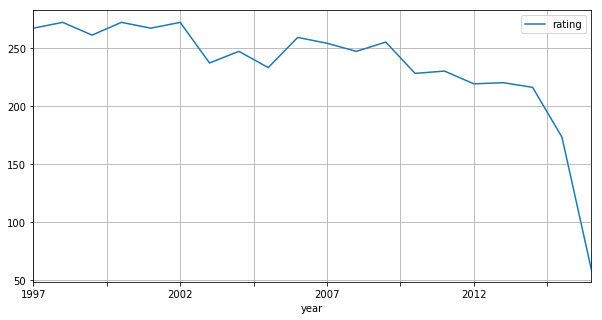

In [106]:
%matplotlib inline

# yearly_average.sort_values(by = 'year', ascending = True)[-20:].plot(x = 'year', y = 'rating',
#                                                                      figsize = (10, 5), grid = True)

yearly_average[-20:].plot(x = 'year', y = 'rating', figsize = (10, 5), grid = True);

### 4.3.4. Pandas: Summary of Movie Rating Notebook
Data Ingestion (Importing), Statistical Analysis, Data Cleaning, Data Visualization, Data Transformation, Merging DataFrames, String Operations, Timestamps.

### 4.3.5. Coding Practice

### 4.3.6. Pandas Discussion

### 4.3.7. Pandas Efficiency - Extra Video Resource

## 4.4. Assessment

In [107]:
movies.isnull().any()

movieId    False
title      False
genres     False
year        True
dtype: bool

(2017-07-29 21:23)